In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [4]:
%matplotlib inline

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.total_bill.mean()

19.785942622950824

In [8]:
## Q1: A report claims that the average total_bill in the New Jersey area is $22. Check this claim.

## H0: mean of total bill in new jersey = $22
## Ha: mean != $22


## Confidence interval: 95%
## p value critical: 5%

## what kind of test? t test

## t test

stats.ttest_1samp(tips.total_bill, 22)

Ttest_1sampResult(statistic=-3.884866483201325, pvalue=0.00013206278606622297)

In [12]:
(tips.total_bill.mean() - 22) / (tips.total_bill.std() / tips.total_bill.count() ** 0.5)

-3.8848664832013187

In [14]:
## Q2: Check whether in general males tip higher than females.

## t test


female_tips = tips.loc[tips.sex == 'Female', 'tip']
male_tips = tips.loc[tips.sex == 'Male', 'tip']

In [15]:
female_tips.mean()

2.833448275862069

In [16]:
male_tips.mean()

3.0896178343949052

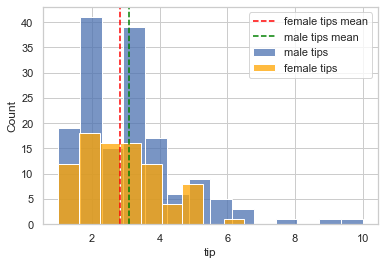

In [17]:
sns.set(style="whitegrid")
sns.histplot(male_tips, label='male tips')
sns.histplot(female_tips, color='orange', label='female tips')
plt.axvline(female_tips.mean(), color='red', linestyle='--', label='female tips mean')
plt.axvline(male_tips.mean(), color='green', linestyle='--', label='male tips mean')
plt.legend()
plt.show() 

In [18]:
## H0: mean of female tips = mean of male tips
## Ha: they are not equal

## confidence: 95%
## significance: 5%

## t test

stats.ttest_ind(female_tips, male_tips)

Ttest_indResult(statistic=-1.3878597054212687, pvalue=0.16645623503456763)

In [19]:
## we fail to reject the null hypothesis because the p value lies in the acceptance region or the confidence region.

In [21]:
## Q3: is there any relationship between the gender of a person and whether they are a smoker or not.

## H0: there is no relationship
## Ha: there is a relationship

## confidence interval: 95%

## test? chi2 test

stats.chi2_contingency?

In [27]:
observed = pd.crosstab(tips.sex, tips.smoker)
observed

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [26]:
stats.chi2_contingency(observed)

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [ ]:
## In fact, the data also suggests that our null hypothesis might be right.

In [ ]:
## Based on the sample data that we got, we reject the null hypothesis meaning that the $22 is off.

In [28]:
## Q4: Check whether there is a significant difference between the mean bill amounts for
## the different days in the data

In [30]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [35]:
Sun_bills = tips.loc[tips.day=='Sun', 'total_bill']
Sat_bills = tips.loc[tips.day=='Sat', 'total_bill']
Thur_bills = tips.loc[tips.day=='Thur', 'total_bill']
Fri_bills = tips.loc[tips.day=='Fri', 'total_bill']

In [36]:
print(Sun_bills.mean())
print(Sat_bills.mean())
print(Thur_bills.mean())
print(Fri_bills.mean())

21.410000000000004
20.441379310344825
17.682741935483865
17.151578947368417


<AxesSubplot:xlabel='day', ylabel='total_bill'>

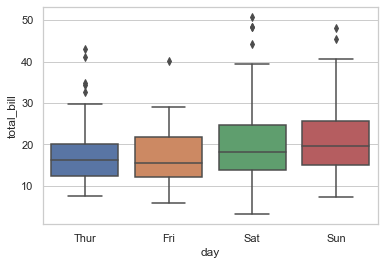

In [37]:
sns.boxplot(y=tips.total_bill, x=tips.day)

In [39]:
## H0: there is not difference in total bills on any particular
## Ha: there is a difference

## confidence: 99%
## p critical 1%

## test? anova

result = stats.f_oneway(Sun_bills, Sat_bills, Fri_bills, Thur_bills)

In [40]:
print(dir(result))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults', '_fields', '_fields_defaults', '_make', '_replace', 'count', 'index', 'pvalue', 'statistic']


In [43]:
result.pvalue

0.04245383328952047

## Machine learning


This is a new way of programming where we feed the input and the output and the machine figures out the patterns
between them.

In Machine learning, we have

Y variable / Dependent variable / Target variable / labels.

X variables / Independent variables / Predictors / Features


either y can be continuous or it be categorical


Machine learnings

1. Regression problem
        y variable is continuous
        
        Examples: House price prediction, stock price forecasting,
            Interest rate prediction, eligible loan amount.
            how many sales will see of a product.
            
            
2. Classification problems
    y variable is categorical in nature
    
    Examples: weather prediction, spam email, which team would win a game,
                image detection, handwriting detection, employee churn, attrition rates.
                audio to text, sentiment analysis.
                
                
                
3. Segmentation problems:
        clustering your data into logical groups using ml.


4. Forecasting problem

    stock price prediction, sales predictions, aqi prediction
    where time is involved, gdp forecasting, interest rate forecasting.
    
    
    here one of the variables is past values of the y
    
    y_t = f(y_(t-1))   ** still more x variables can be there.
 


70-80% of machine learning problems - classification problems

10-15% - regression problems

remaining - forecasting problem / segmentation problem


Another way of categorizing machine learning

1. Supervised learning
    y variable is present
2. Unsupervised learning
    y variable is not required
    segmentation problem is unsurpervised.
    
3. Re-inforcement learning
    the algorithms just tries many many things to learn what is right and what is wrong.


## Steps of a machine learning project



Step1: pre-modelling

What is the business problem?
convert the business object into a statistical problem
    y, X
    what kind of technique?
    
Gathering the data.
    Internal sources
    External sources
        web scraping, pdfs
        
        Data vendors
            Nielson, ZS,...
            
            
Exploratory data analysis

Data auditing
    (Garbage in garbage out)

Step2: modelling

Data preparation / Data cleaning
    missing values
    outlier treatment
    fix the problems
    
    Most machine learning only recognized numbers / continuous
    convert categorical columns to numbers
    
        1. label encoding
        2. dummy variable creation / one hot encoding
        
        
    Feature engineering
        coming up with some new KPIs
        feature selection
        combining existing features to create new meaningful features based on machine learning
        
        
     select what algorithm works best for my problem.
     
     
     train-test split
     
         accuracy_training >> testing accuracy			-> overfitting	
         accuracy_training is itself low.			-> underfitting	
         training_accuracy ~ testing accuracy			-> balanced model	


    create the model
            based on the algorithm that we decided.
            
            
3. Post modelling

    judging the model's accuracy on new data.
    integrate the model with your website.
    *keep on incrementally training the model on new data. 
    

In [ ]:
## big data
## hadoop, spark (pandas version for distibuted data), hive, impala (sql for distributed)
## oltp vs olap (data warehousing)

In [ ]:
## Case study

## Intro
## Statistical models

## 1. Linear Regression
## 2. Logistic Regression